In [1]:
from pymultifracs.simul import mrw
import numpy as np

X = mrw(shape=(65536, 2), H=0.8, lam=0.3, L=65536)

In [2]:
X

array([[-3.44286348e-04,  5.76844328e-05],
       [-4.75057684e-04,  1.47013595e-04],
       [-6.14299679e-04,  1.80934631e-04],
       ...,
       [-1.93567658e-01,  7.46090118e-01],
       [-1.93640186e-01,  7.46044284e-01],
       [-1.93615929e-01,  7.46090315e-01]])

In [3]:
wt_name = 'db2'
p_exp = 2
j2 = np.log2(65536) - 3

gamint = 1
wtype = True

In [4]:
from pymultifracs.wavelet import wavelet_analysis

In [5]:
from importlib import reload

In [6]:
import pymultifracs.wavelet
reload(pymultifracs.wavelet)
from pymultifracs.wavelet import wavelet_analysis

In [7]:
WT1 = wavelet_analysis(X[:, 0], p_exp=p_exp, j2=j2, gamint=gamint, weighted=wtype)

In [8]:
WT2 = wavelet_analysis(X[:, 1], p_exp=p_exp, j2=j2, gamint=gamint, weighted=wtype)

In [9]:
from pymultifracs.estimation import estimate_hmin

In [10]:
estimate_hmin(WT1.wt_coefs, 3, WT1.j2_eff, wtype)[0].min()

1.728323751093812

In [11]:
estimate_hmin(WT2.wt_coefs, 3, WT2.j2_eff, wtype)[0].min()

1.525602783895922

In [432]:
import pymultifracs.bivariate.bivariate_cumulants
reload(pymultifracs.bivariate.bivariate_cumulants)
from pymultifracs.bivariate.bivariate_cumulants import BiCumulants

In [433]:
BiCum = BiCumulants(WT1.wt_leaders, WT2.wt_leaders, n_cumul=2, j1=3, j2=WT1.j2_eff, weighted=True)

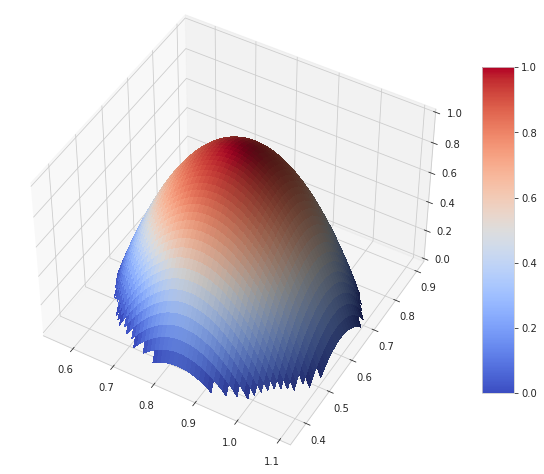

In [434]:
BiCum.plot_legendre(resolution=150)
plt.gca().view_init(elev=45)

In [338]:
BiCum.c02

array([-0.03597111])

In [339]:
h, L = BiCum.compute_legendre()

[0.00127897]


In [172]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

In [201]:
?ax.plot

Signature: ax.plot(xs, ys, *args, zdir='z', **kwargs)
Docstring:
Plot 2D or 3D data.

Parameters
----------
xs : 1D array-like
    x coordinates of vertices.
ys : 1D array-like
    y coordinates of vertices.
zs : float or 1D array-like
    z coordinates of vertices; either one for all points or one for
    each point.
zdir : {'x', 'y', 'z'}, default: 'z'
    When plotting 2D data, the direction to use as z ('x', 'y' or 'z').
**kwargs
    Other arguments are forwarded to `matplotlib.axes.Axes.plot`.
File:      ~/anaconda3/envs/mfanalysis3/lib/python3.8/site-packages/mpl_toolkits/mplot3d/axes3d.py
Type:      method


In [226]:
L.max(axis=0).shape

(1000,)

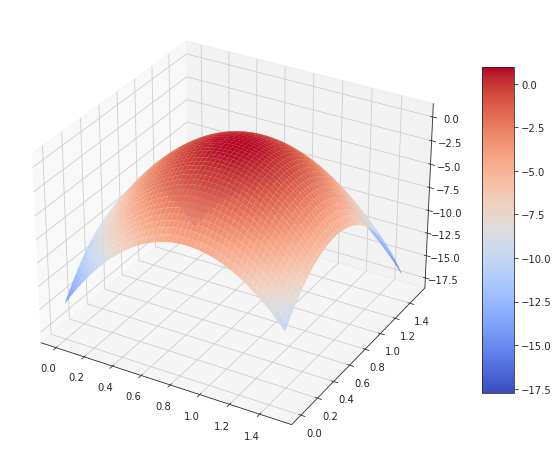

In [241]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

# Make data.
# X = np.arange(-5, 5, 0.25)
# Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(h, h)
# R = np.sqrt(X**2 + Y**2)
# Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, L, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
# cset = ax.contour(X, Y, L, zdir='x', offset=0, colors='black', levels=10)
# cset = ax.contourf(X, Y, L, zdir='y', colors='black', levels=10, offset=1.5)
# ax.plot(h, L.mean(axis=0), zs=0, zdir='x', label='curve in (x,y)') # zs=0
# ax.plot(h, L.mean(axis=1), zs=1.5, zdir='y', label='curve in (x,y)') # zs=0

# Customize the z axis.
# ax.set_zlim(0, 1.05)
# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.6, aspect=10)

plt.show()

In [154]:
L

array([[-14.75196255,  -4.57241856,  -4.57241856, ...,  -4.57241856,
         -4.57241856,  -4.57241856],
       [ -8.50559228,   1.        ,   1.        , ...,   1.        ,
          1.        ,   1.        ],
       [ -8.50559228,   1.        ,   1.        , ...,   1.        ,
          1.        ,   1.        ],
       ...,
       [ -8.50559228,   1.        ,   1.        , ...,   1.        ,
          1.        ,   1.        ],
       [ -8.50559228,   1.        ,   1.        , ...,   1.        ,
          1.        ,   1.        ],
       [ -8.50559228,   1.        ,   1.        , ...,   1.        ,
          1.        ,   1.        ]])

In [146]:
import matplotlib.pyplot as plt

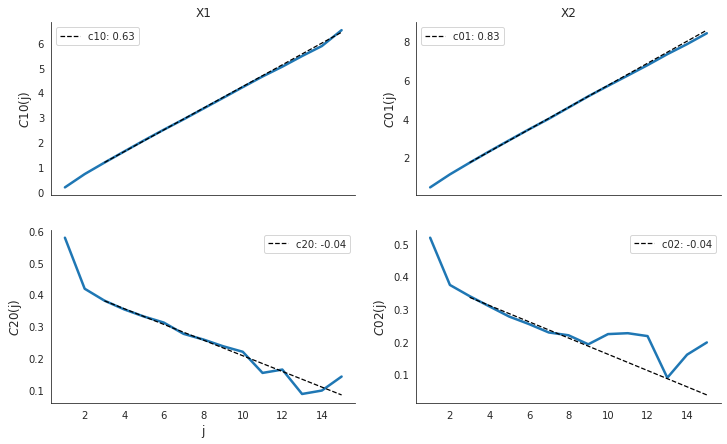

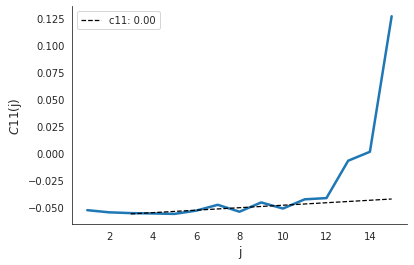

In [126]:
BiCum.plot()
plt.show()

In [16]:
BiCum.j

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [17]:
import matplotlib.pyplot as plt

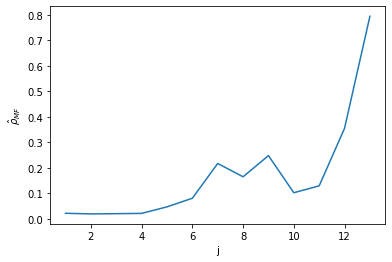

In [18]:
plt.plot(BiCum.j, BiCum.RHO_MF)
plt.xlabel('j')
plt.ylabel(r'$\hat{\rho}_{MF}$')
plt.show()

In [19]:
BiCum.rho_mf

array([-0.24711894])

In [20]:
BiCum.log_cumulants

array([[ 0.        ,  1.81829372, -0.07768155],
       [ 1.86396866,  0.02122974,  0.        ],
       [-0.09500786,  0.        ,  0.        ]])

In [21]:
BiCum.values[0, 0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [22]:
BiCum.rho_mf

array([-0.24711894])

In [414]:
import pymultifracs.bivariate.bivariate_structurefunction
reload(pymultifracs.bivariate.bivariate_structurefunction)
from pymultifracs.bivariate.bivariate_structurefunction import BiStructureFunction

In [119]:
BiSF = BiStructureFunction(WT1.wt_coefs, WT2.wt_coefs, j1=3, j2=WT1.j2_eff, q1=np.array([0, 1, 2]), q2=np.array([0, 1, 2]), wtype=True)

In [121]:
sns.set_style('white')

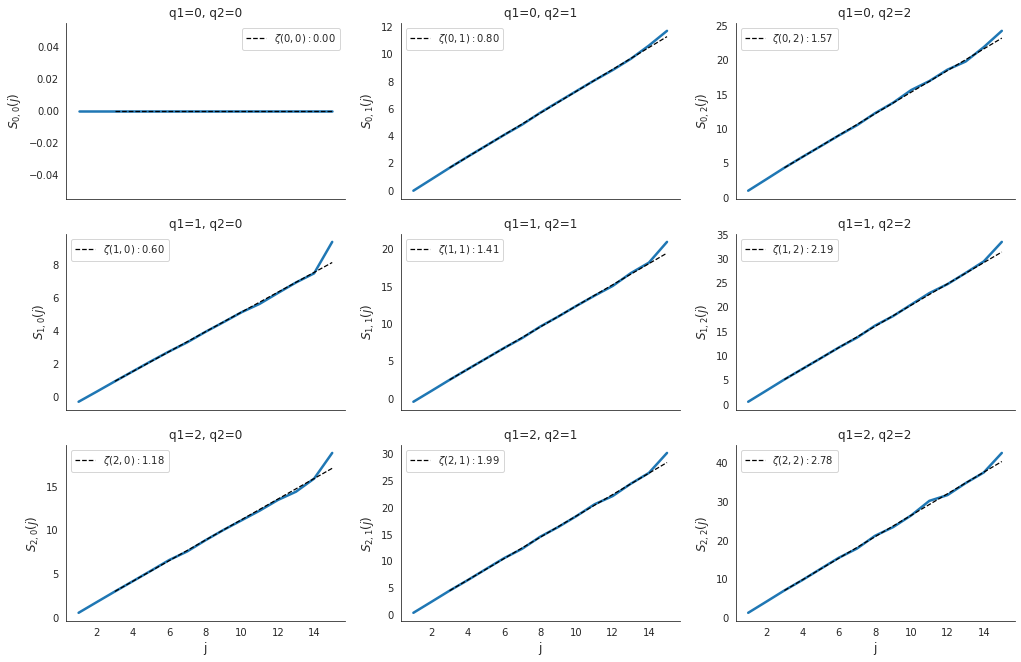

In [122]:
BiSF.plot()
plt.show()

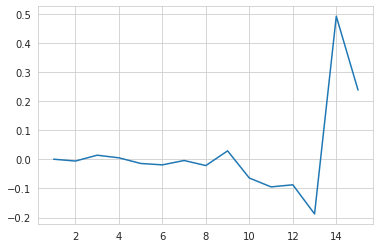

In [83]:
plt.plot(BiSF.j, BiSF.RHO_SS)
plt.show()

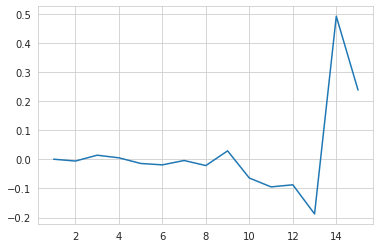

In [84]:
plt.plot(BiSF.j, BiSF.RHO_SS)
plt.show()

In [27]:
BiSF.zeta

array([[0.        , 1.77833122, 3.48290377],
       [1.82012962, 3.61850965, 5.32429067],
       [3.5912768 , 5.41295181, 7.11419278]])

# Loading pregenerated signals

In [28]:
from scipy.io import loadmat

In [29]:
!ls ../data

Archive.zip	    DataSet_nossnoMF.mat  DataSet_ssnoMF.mat
DataSet_nossMF.mat  DataSet_ssMF.mat


In [30]:
names = ['nossnoMF', 'nossMF', 'ssMF', 'ssnoMF']

In [31]:
data = {
    key: loadmat(f'../data/DataSet_{key}.mat')['data'].transpose() for key in names
}

In [32]:
from collections import defaultdict

In [33]:
param = {
    key: loadmat(f'../data/DataSet_{key}.mat')['params'] for key in names
}

In [34]:
param = {
    key: {
        param[key].dtype.names[i]: param[key][0, 0][i] for i in range(len(param[key][0, 0]))
    }
    for key in param
}

In [35]:
key = 'nossnoMF'

In [36]:
X = data[key]

In [37]:
param['nossMF']

{'nbcopies': array([[1]], dtype=uint8),
 'FBM': array([[0]], dtype=uint8),
 'H': array([[0.6, 0.8]]),
 'Correl': array([[1, 0],
        [0, 1]], dtype=uint8),
 'correlation': array([[0]], dtype=uint8),
 'mft': array([[0.17320508, 0.17320508, 0.7       ]]),
 'Sigma2': array([[1, 1]], dtype=uint8),
 'nbsamples': array([[262144]], dtype=int32),
 'T': array([[0, 1]], dtype=uint8),
 'W': array([[1, 0],
        [0, 1]], dtype=uint8),
 'Nwt': array([[2]], dtype=uint8),
 'j1': array([[6]], dtype=uint8),
 'j2': array([[13]], dtype=uint8),
 'alpha': array([[0.05]]),
 'FigNum': array([[0]], dtype=uint8),
 'wtype': array([[1]], dtype=uint8)}

In [38]:
wtype=False

In [490]:
def plot_key(key):
    
    X = data[key]

    j1 = 3
    j2 = np.log2(X.shape[0]) - 3
    p_exp=2
    gamint = 1

    WT1 = wavelet_analysis(X[:, 0], p_exp=p_exp, j2=j2, gamint=gamint, weighted=wtype)
    WT2 = wavelet_analysis(X[:, 1], p_exp=p_exp, j2=j2, gamint=gamint, weighted=wtype)

    print('hmin', estimate_hmin(WT1.wt_coefs, 3, WT1.j2_eff, wtype)[0].min())
    print('hmin', estimate_hmin(WT2.wt_coefs, 3, WT2.j2_eff, wtype)[0].min())
    
    BiCum = BiCumulants(WT1.wt_leaders, WT2.wt_leaders, n_cumul=2, j1=j1, j2=WT1.j2_eff, weighted=True)
    BiSF = BiStructureFunction(WT1.wt_coefs, WT2.wt_coefs, j1=j1, j2=WT1.j2_eff, q1=np.array([0, 1, 2]), q2=np.array([0, 1, 2]), weighted=True)
    
    print('rho_mf', BiCum.rho_mf)
#     print('rho_ss', BiSF.rho_ss)
    
    fig_m, fig_c = BiCum.plot()
    fig_m.suptitle(key)
    fig_c.suptitle(key)
    BiCum.plot_legendre(resolution=30)
    plt.suptitle(key)
    plt.show()
    
    plt.plot(BiSF.j, BiSF.coherence, label='second order (wavelet) coherence')
    plt.plot(BiCum.j, BiCum.RHO_MF, label=r'multifractal (leader) coherence')
    plt.xlabel('j')
    # plt.ylabel(r'$\hat{\rho}_{MF}$')
    plt.title(key)
    plt.legend()
    plt.show()
    
    return BiCum, BiSF

In [40]:
param['nossMF']

{'nbcopies': array([[1]], dtype=uint8),
 'FBM': array([[0]], dtype=uint8),
 'H': array([[0.6, 0.8]]),
 'Correl': array([[1, 0],
        [0, 1]], dtype=uint8),
 'correlation': array([[0]], dtype=uint8),
 'mft': array([[0.17320508, 0.17320508, 0.7       ]]),
 'Sigma2': array([[1, 1]], dtype=uint8),
 'nbsamples': array([[262144]], dtype=int32),
 'T': array([[0, 1]], dtype=uint8),
 'W': array([[1, 0],
        [0, 1]], dtype=uint8),
 'Nwt': array([[2]], dtype=uint8),
 'j1': array([[6]], dtype=uint8),
 'j2': array([[13]], dtype=uint8),
 'alpha': array([[0.05]]),
 'FigNum': array([[0]], dtype=uint8),
 'wtype': array([[1]], dtype=uint8)}

In [41]:
data['ssMF'][:10, 0]

array([-0.56047312,  0.74299145,  0.575004  , -0.26972397,  0.45216772,
        0.49946845, -0.11239754, -0.71658946, -0.32318804, -0.10481214])

In [42]:
data['ssMF'][:10, 1]

array([ 0.13582353, -0.29167578, -0.23503471,  0.306125  , -0.29628571,
       -0.30570675,  0.09222877,  0.47235979,  0.19983602,  0.1627435 ])

In [43]:
from pymultifracs.mfa import mf_analysis_full

In [44]:
data['ssMF']

array([[-0.56047312,  0.13582353],
       [ 0.74299145, -0.29167578],
       [ 0.575004  , -0.23503471],
       ...,
       [-1.00525974,  2.8059564 ],
       [ 0.05810281,  0.38093328],
       [-1.12093232,  2.33185249]])

In [45]:
dwt, lwt = mf_analysis_full(data['ssMF'], j1=3, j2=15, gamint=1, weighted=False, p_exp=2)

In [46]:
dwt.hmin

array([0.38234072, 0.55556493])

In [47]:
dwt.structure.H

array([-0.40205377, -0.2231572 ])

In [48]:
lwt.cumulants.log_cumulants[0, :]

array([0.60973248, 0.79171076])

In [49]:
lwt.cumulants.log_cumulants[1, :]

array([-0.02568105, -0.02708021])

hmin 0.3823407184289528
hmin 0.5555649267598117
rho_mf [0.70372861]


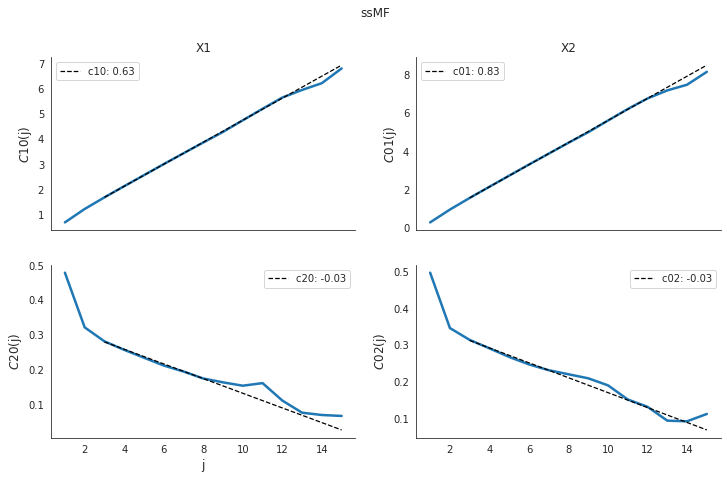

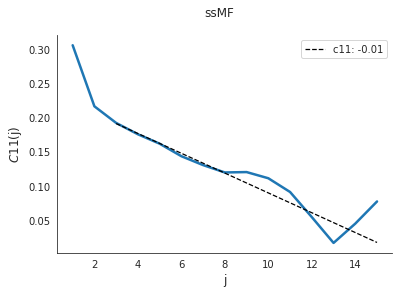

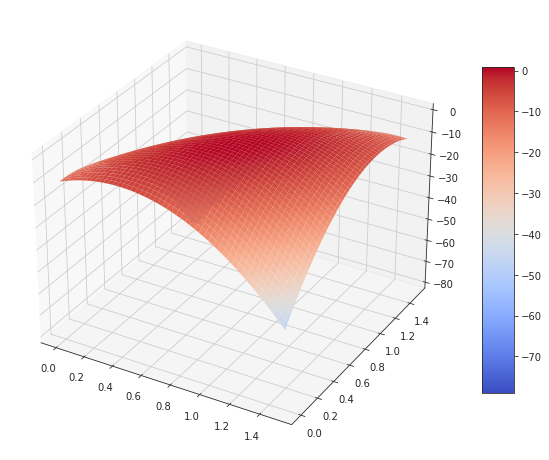

<Figure size 432x288 with 0 Axes>

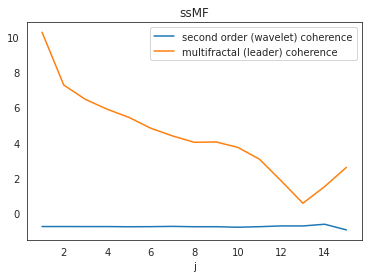

In [252]:
c, sf = plot_key('ssMF')

In [ ]:
plot_key('nossnoMF')

In [428]:
import seaborn as sns

In [429]:
sns.set_style('whitegrid')

In [533]:
import pymultifracs.bivariate.bivariate_cumulants
reload(pymultifracs.bivariate.bivariate_cumulants)
from pymultifracs.bivariate.bivariate_cumulants import BiCumulants

hmin 0.3464958169052149
hmin 0.6080676400804853
rho_mf [-0.04630067]


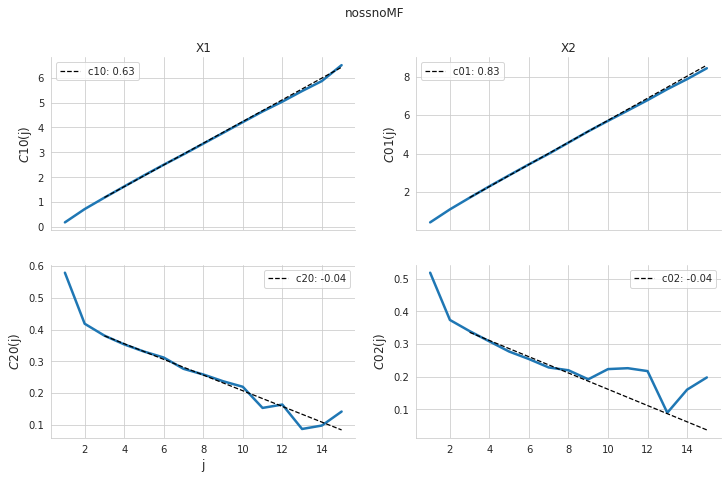

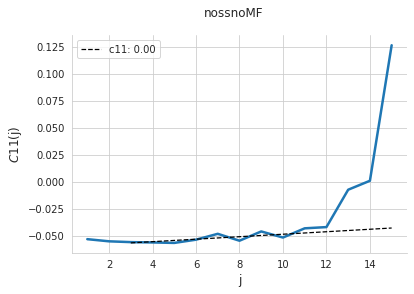

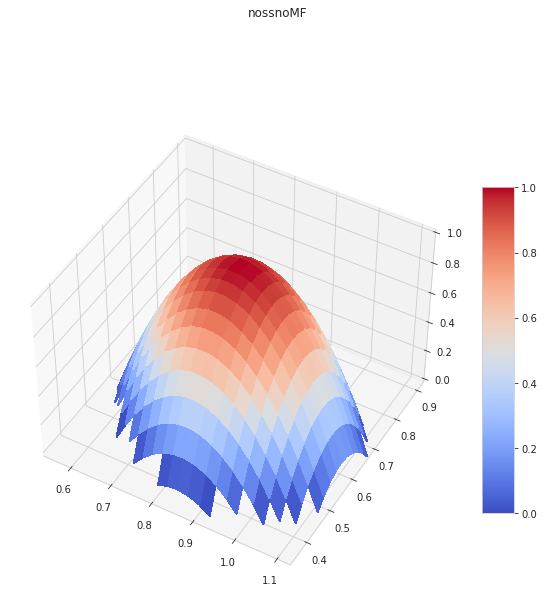

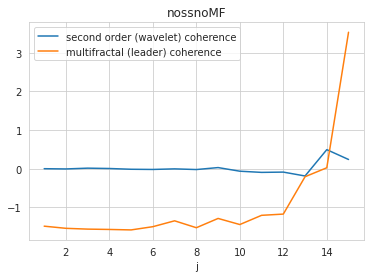

hmin 0.3708354518037801
hmin 0.5638270560798042
rho_mf [0.61084336]


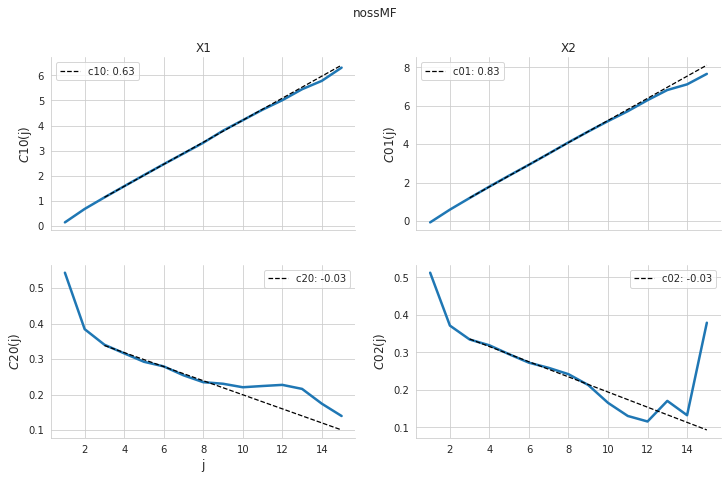

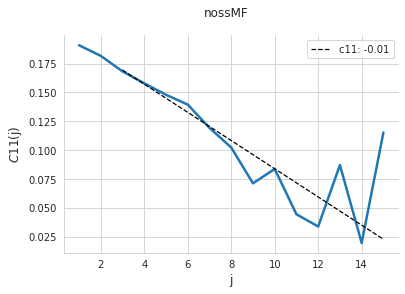

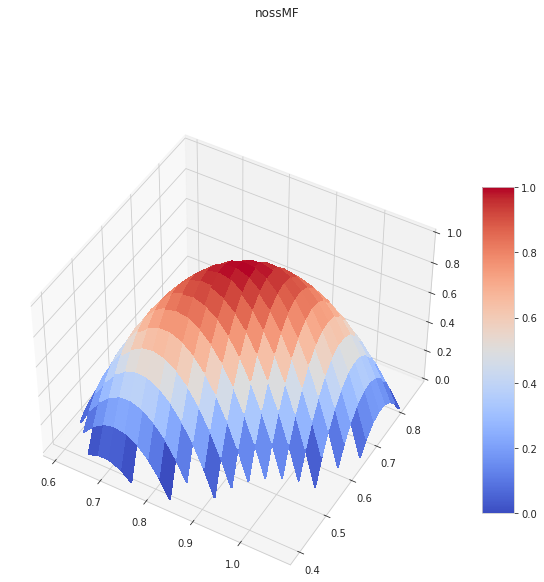

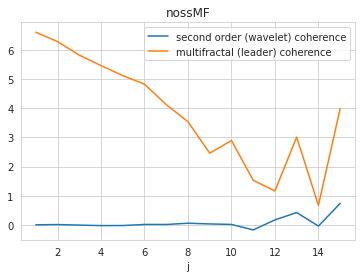

hmin 0.3823407184289528
hmin 0.5555649267598117
rho_mf [0.70372861]


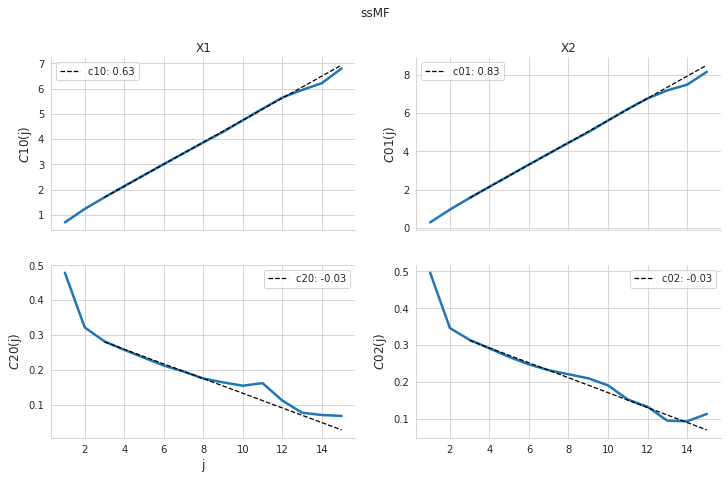

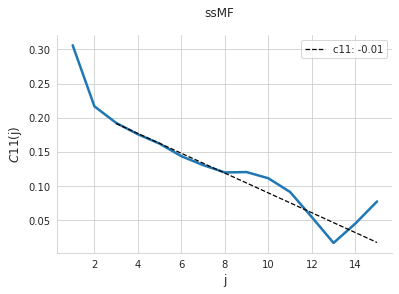

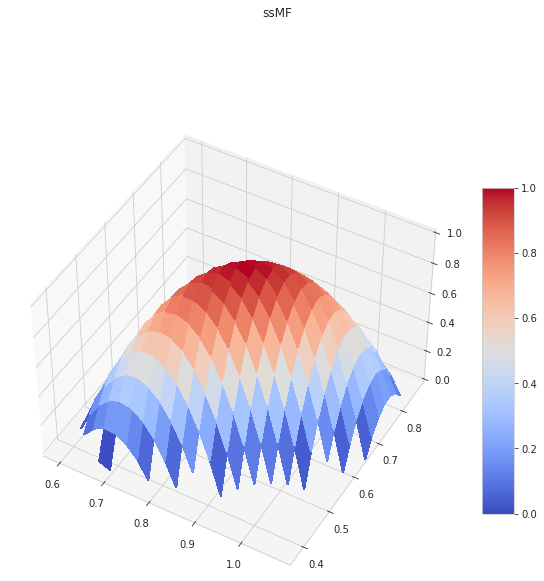

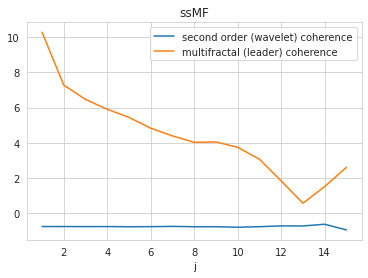

hmin 0.2917365501661836
hmin 0.5697728345504193
rho_mf [0.01734741]


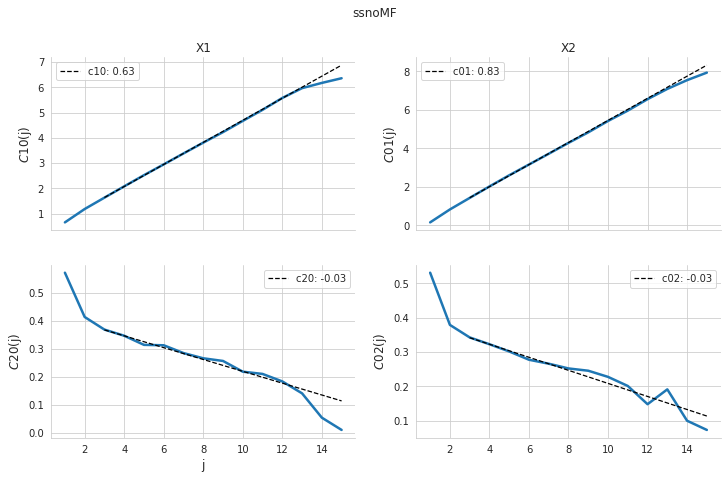

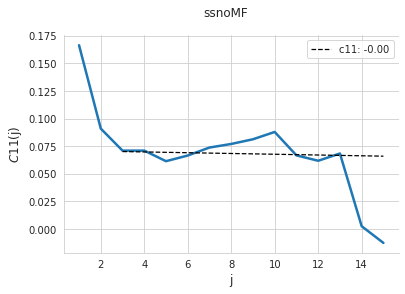

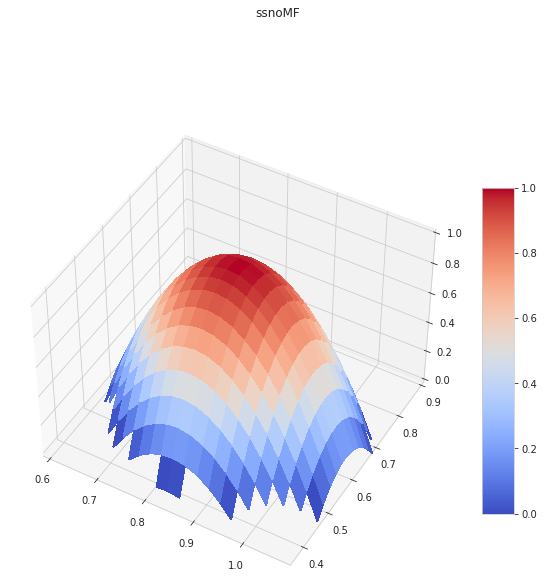

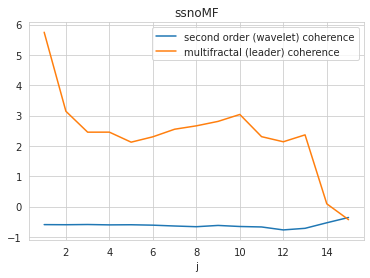

In [534]:
for key in data:
    plot_key(key)

In [ ]:
j2 = np.log2(X.shape[0]) - 3
p_exp=2
gamint = 1.0

In [64]:
WT1 = wavelet_analysis(X[:, 0], p_exp=p_exp, j2=j2, gamint=gamint, weighted=wtype)
WT2 = wavelet_analysis(X[:, 1], p_exp=p_exp, j2=j2, gamint=gamint, weighted=wtype)

In [65]:
BiCum = BiCumulants(WT1.wt_leaders, WT2.wt_leaders, n_cumul=2, j1=3, j2=WT1.j2_eff, wtype=True)

In [66]:
BiCum.rho_mf

array([-0.04630067])

In [67]:
BiSF = BiStructureFunction(WT1.wt_coefs, WT2.wt_coefs, j1=3, j2=WT1.j2_eff, q1=np.array([0, 1, 2]), q2=np.array([0, 1, 2]), wtype=True)

In [68]:
BiSF.rho_ss

array([1.60816034])

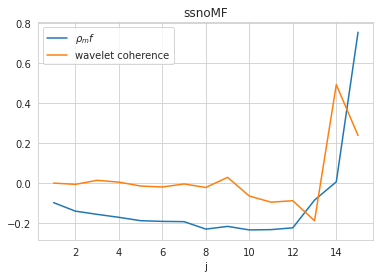

In [69]:
plt.plot(BiCum.j, BiCum.RHO_MF, label=r'$\rho_mf$')
plt.plot(BiSF.j, BiSF.RHO_SS, label='wavelet coherence')
plt.xlabel('j')
# plt.ylabel(r'$\hat{\rho}_{MF}$')
plt.title(key)
plt.legend()
plt.show()